# **Breast Cancer Classification using SVM, Decision Tree, and Random Forest**

**Author: Harish Gaddam**


**Student ID: 24023883**

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Import scikit-learn modules for data handling and modeling
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)


In [8]:
# Import classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [9]:
# Set plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


**1. Load the Breast Cancer Wisconsin dataset**

In [11]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


**2. Data Preprocessing**

In [12]:
# Check for missing values
if X.isnull().sum().any():
    # If missing values exist, drop rows with missing values
    X.dropna(inplace=True)
    y = y[X.index]

# Encode target variable: 0 = malignant, 1 = benign
# Note: In the original dataset, 0 = malignant, 1 = benign
# For consistency with your report, we'll maintain this encoding

# Feature scaling: Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


**3. Initialize classifiers with default parameters**

In [13]:
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)


**4. Train classifiers**

In [14]:
svm_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**5. Make predictions on the test set**

In [15]:
svm_pred = svm_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)


**6. Evaluate classifiers using various metrics**

In [17]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")


In [18]:
# Evaluate each model
evaluate_model("Support Vector Machine", y_test, svm_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)


--- Support Vector Machine ---
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1 Score: 0.9790
Confusion Matrix:
[[41  1]
 [ 2 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



--- Decision Tree ---
Accuracy: 0.9123
Precision: 0.9559
Recall: 0.9028
F1 Score: 0.9286
Confusion Matrix:
[[39  3]
 [ 7 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



--- Random Forest ---
Accuracy: 0.9

**7. Plot ROC curves for all classifiers**

In [19]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure()
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Classifiers")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [20]:
# Dictionary of models for plotting
models = {
    "SVM": svm_clf,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
}


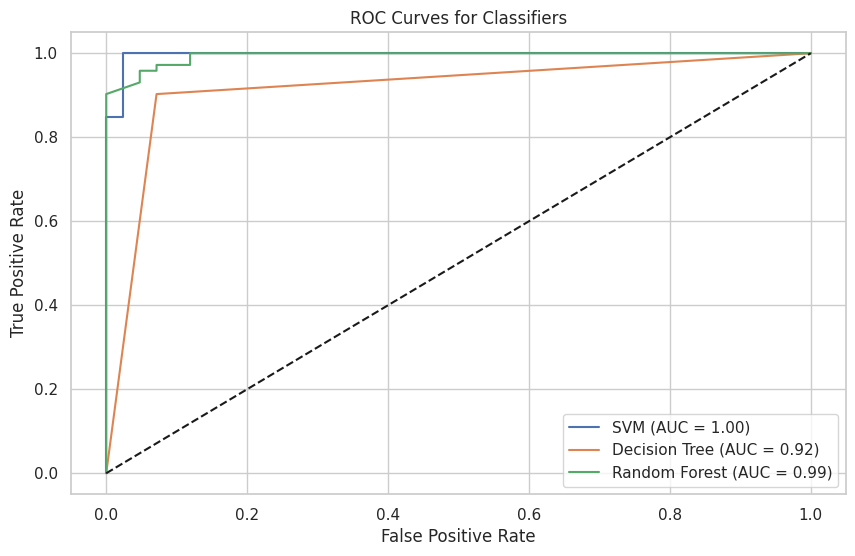

In [21]:
# Plot ROC curves
plot_roc_curves(models, X_test, y_test)
